# Kiểm tra môi trường phát triển phần mềm đã cài đặt

Sau khi cài đặt các phần mềm như Python (đi kèm với Anaconda), OpenCV, Tensorflow, Keras (thông qua giao diện của Anaconda Navigator), bước tiếp theo là cần kiểm tra xem các cài đặt có thành công hay không.

Đoạn mã bên dưới hiển thị phiên bản của các phần mềm được cài đặt; sau đó sẽ kết nối với Internet để đọc một ảnh (Lenna.png) - và hiển thị ảnh đó với các colormap khác nhau sử dụng thư viện matplotlib. (Chương trình chỉ chạy được khi có kết nối với Internet).

In [8]:
# written by B2DL

#import the necessary packages
import numpy as np
import urllib
import matplotlib.pyplot as plt

# show version of packages

# python version
from platform import python_version
print ('Python version: {}'.format(python_version()))

# opencv version
import cv2
print('OpenCV version: {}'.format(cv2.__version__))

# tensorflow version
import tensorflow as tf
print('Tensorflow version: {}'.format(tf.__version__))

# keras version
import keras 
print('Keras version: {}'.format(keras.__version__))

# a function to read image from an url
def url2image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype='uint8')
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
     
	# return the image
	return image

import sys
if sys.version_info[0] == 3:
    from urllib.request import urlopen
else:
    from urllib import urlopen

# MAIN 
img_url = 'https://upload.wikimedia.org/wikipedia/en/2/24/Lenna.png'
bgr_img = url2image(img_url)

# BGR order is the default in OpenCV
plt.subplot(3, 2, 1)
plt.axis('off')
plt.title('Original imge - BGR color')
plt.imshow(bgr_img)

plt.subplot(3, 2, 2)
plt.axis('off')
plt.title('Original imge - CORRECT color')
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))

gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
plt.subplot(3, 2, 3)
plt.axis('off')
plt.title('Gray image - No CMAP')
plt.imshow(gray_img)


plt.subplot(3, 2, 4)
plt.axis('off')
plt.title('Gray image - CMAP - gray')
plt.imshow(gray_img, cmap = plt.get_cmap('gray'))

plt.subplot(3, 2, 5)
plt.axis('off')
plt.title('Gray image - CMAP - spring')
plt.imshow(gray_img, cmap = plt.get_cmap('spring'))

plt.subplot(3, 2, 6)
plt.axis('off')
plt.title('Gray image - CMAP - ocean')
plt.imshow(gray_img, cmap = plt.get_cmap('ocean'))

plt.show()



# Phát hiện khuôn mặt - Face Detector Demo

Đoạn mã bên dưới sẽ tải ảnh và tập tin cấu hình face detector về máy, và thực thi việc phát hiện khuôn mặt trong ảnh. (Chương trình chỉ chạy được khi có kết nối với Internet).      

The cascade classifier xml file already existed



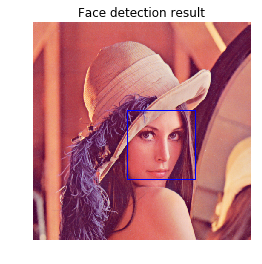

In [9]:
# written by B2DL

#import the necessary packages
import numpy as np
import urllib
import matplotlib.pyplot as plt
import cv2

# a function to read image from an url
def url2image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype='uint8')
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
     
	# return the image
	return image

import sys
if sys.version_info[0] == 3:
    from urllib.request import urlopen
else:
    from urllib import urlopen

import os.path

# MAIN 
# load image from url 
bgr_img = url2image('https://upload.wikimedia.org/wikipedia/en/2/24/Lenna.png')

gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

face_classifier_xml = 'my_haarcascade_frontalface_default.xml'
ret = os.path.exists(face_classifier_xml)

if ret:
    print('The cascade classifier xml file already existed\n')
else:
    print('Downloading the cascade classifier xml file from Internet ...\n')
    face_classifier_url= 'https://raw.githubusercontent.com/shantnu/Webcam-Face-Detect/master/' + \
    'haarcascade_frontalface_default.xml'
    resp = urlopen(face_classifier_url)
    data = resp.read() 

    #open the file for writing
    fh = open(face_classifier_xml, "wb")

    # read from request while writing to file
    fh.write(data)
    fh.close()
    resp.close()
    
face_cascade = cv2.CascadeClassifier(face_classifier_xml)

#face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray_img, 1.25, 3)
for (x,y,w,h) in faces:
    cv2.rectangle(bgr_img,(x,y),(x+w,y+h),(255,0,0),2)

plt.axis('off')
plt.title('Face detection result')
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
plt.show()
        

# Phát hiện người đi bộ - Pedestrian Detector Demo

Đoạn mã bên dưới sẽ tải ảnh về máy, và thực thi việc phát hiện người đi bộ trong ảnh. (Chương trình chỉ chạy được khi có kết nối với Internet).      

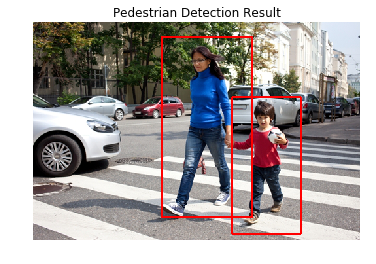

In [10]:
# written by B2DL

#import the necessary packages
import numpy as np
import urllib
import matplotlib.pyplot as plt
import cv2

# a function to read image from an url
def url2image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype='uint8')
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
     
	# return the image
	return image


import sys
if sys.version_info[0] == 3:
    from urllib.request import urlopen
else:
    from urllib import urlopen

# MAIN 
# load image from url 
bgr_img = url2image('http://linkalaw.ca/wp-content/uploads/2016/09/' + \
'Woman-with-a-child-going-on-a-pedestrian-crossing.jpg')


# initialize the HOG descriptor based person detector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# detect people in the image
(rects, weights) = hog.detectMultiScale(bgr_img, winStride=(4, 4), padding=(8, 8), scale=1.05)

# draw the original bounding boxes
for (x, y, w, h) in rects:
	cv2.rectangle(bgr_img, (x, y), (x + w, y + h), (0, 0, 255), 2)
    
plt.axis('off')
plt.title('Pedestrian Detection Result')
   
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
plt.show()

# Nhận dạng chữ số viết tay - Hand-written Digits Recognition Demo

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

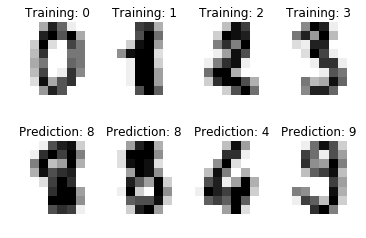

In [11]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])

print('Classification report for classifier %s:\n%s\n'
      % (classifier, metrics.classification_report(expected, predicted)))
print('Confusion matrix:\n%s' % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

# Phát hiện vùng chữ số từ ảnh - Digits Detection Demo 2

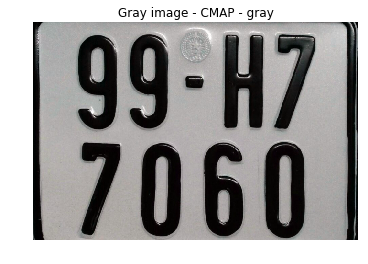

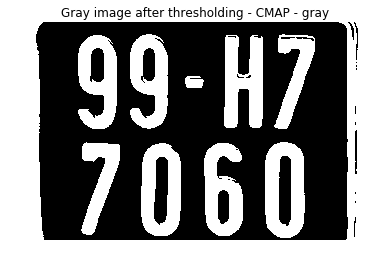

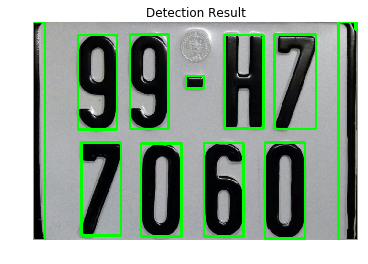

In [12]:
#import the necessary packages
import numpy as np
import urllib
import matplotlib.pyplot as plt
import cv2
from sklearn.externals import joblib
from skimage.feature import hog
from sklearn.svm import LinearSVC

# a function to read image from an url
def url2image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
     
	# return the image
	return image

import sys
if sys.version_info[0] == 3:
    from urllib.request import urlopen
else:
    from urllib import urlopen

#MAIN    
# load image from url 
#bgr_img = url2image('http://hanzratech.in/figures/digit-reco-1-in.jpg')

#bgr_img = url2image('https://s9.postimg.org/6mz4c7kof/IMG_0034.jpg')

bgr_img = url2image('http://media.phapluatplus.vn/files/thanhhuyen/2016/04/04/\
12939421_258772247791487_1019266212_n-0714.jpg')
#bgr_img = cv2.imread('mytest.jpg')

plt.axis('off')
plt.title('Gray image - CMAP - gray')
plt.imshow(bgr_img, cmap = plt.get_cmap('gray'))
plt.show()

# convert to grayscale and apply Gaussian filtering
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
gray_img = cv2.GaussianBlur(gray_img, (5, 5), 0)

# threshold the image
ret, th_img = cv2.threshold(gray_img, 90, 255, cv2.THRESH_BINARY_INV)

plt.axis('off')
plt.title('Gray image after thresholding - CMAP - gray')
plt.imshow(th_img, cmap = plt.get_cmap('gray'))
plt.show()

# find contours in the image
#opencv2
#ctrs,hier = cv2.findContours(th_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#opencv3
temp_img, ctrs, hier = cv2.findContours(th_img.copy(), \
                                        cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# get rectangles contains each contour
rects = [cv2.boundingRect(ctr) for ctr in ctrs]

# for each rectangular region, calculate features and predict
for rect in rects:
    # draw the rectangles
    cv2.rectangle(bgr_img, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 

plt.axis('off')
plt.title('Detection Result')
plt.imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
plt.show()